# Exercise 1

In [164]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
def read_weighted_edges(file):
    data = iter(open(file, "r", encoding="utf-8")) 
    n = int(next(data))

    matrix = [[x for x in row.strip().split(" ")] for row in data] 
    matrix = np.array(matrix)

    edges = []
    for i in range(n):
        for j in range(n):
            if matrix[i][j] != 0 and i != j and (j, i, matrix[j][i]) not in edges:
                edges.append((i, j, matrix[i][j])) 

    edges = sorted(edges, key=lambda x: x[2], reverse=True)

    return n, edges

In [165]:
def adjacency_matrix(n, edges):
    adj_matrix = np.zeros((n, n))

    for edge in edges: 
        i, j, _ = edge
        adj_matrix[i, j] = 1 
        adj_matrix[j, i] = 1

    return adj_matrix

def degree_matrix(adj_matrix):
    return np.diag(np.sum(adj_matrix, axis=1))

In [166]:
def normalized_laplacian_matrix(adj_matrix): 
    d_matrix = degree_matrix(adj_matrix)

    with np.errstate(divide='ignore'):
        d_matrix_sqrt = np.diag(1 / np.sqrt(np.diag(d_matrix)))

    d_matrix_sqrt[np.isinf(d_matrix_sqrt)] = 0 # Replace inf values with 0

    return d_matrix_sqrt @ (d_matrix - adj_matrix) @ d_matrix_sqrt

def second_smallest_eigenvalue(L): 
    eigenvalues = np.linalg.eigvals(L) 
    eigenvalues.sort()

    return eigenvalues[1]

n, weighted_edges = read_weighted_edges("/Users/yuchenhongshu/UMD_Courses/MATH420/HW/amsc420-project-2/sgb128Nodes41to80_weight.txt") 
m = len(weighted_edges)

store_lambda = []

for k in range(1, m + 1):
    adj_matrix = adjacency_matrix(n, weighted_edges[:k]) 
    L = normalized_laplacian_matrix(adj_matrix)
    lambda_value = second_smallest_eigenvalue(L) 
    store_lambda.append(lambda_value)

## Exercise 1.1

/usr/local/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


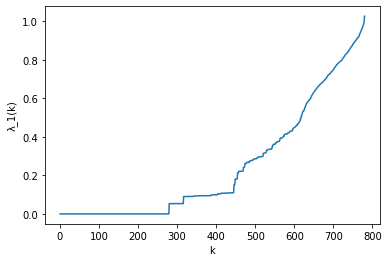

In [167]:
k_values = np.arange(1, m + 1) 
plt.plot(k_values, store_lambda) 
plt.xlabel("k") 
plt.ylabel("λ_1(k)")
plt.show()

## Exercise 1.2

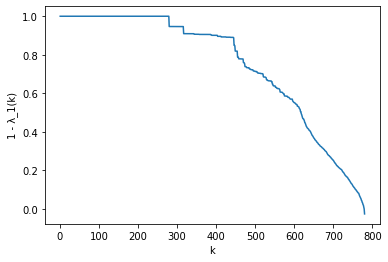

In [168]:
minus_lambda = 1 - np.array(store_lambda) 
plt.plot(k_values, minus_lambda) 
plt.xlabel("k")
plt.ylabel("1 - λ_1(k)")
plt.show()

## Exercise 1.3

In [169]:
from scipy.optimize import curve_fit 

def log_log(k, c0, alpha):
    return c0 - alpha * np.log(k) 

k_values_fit = k_values[5: m - 5]
log_minus_lambda = np.log(minus_lambda[5: m - 5])
params, _ = curve_fit(log_log, k_values_fit, log_minus_lambda) 
c0, alpha = params
print(f"c0: {c0}")
print(f"alpha: {alpha}")

c0: 1.8686883003566588
alpha: 0.4022978328420497


/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:601: ComplexWarning: Casting complex values to real discards the imaginary part
  a = asarray(a, dtype=dtype, order=order)


# Exercise 2

## Exercise 2.1

In [170]:
weight_matrix = np.array(
[[0, 4, 1, 0, 0, 3],
 [4, 0, 2, 0, 0, 1],
 [1, 2, 0, 2, 1, 0],
 [0, 0, 2, 0, 4, 1],
 [0, 0, 1, 4, 0, 2],
 [3, 1, 0, 1, 2, 0] 
])
print("Weight matrix:")
print(weight_matrix)

Weight matrix:
[[0 4 1 0 0 3]
 [4 0 2 0 0 1]
 [1 2 0 2 1 0]
 [0 0 2 0 4 1]
 [0 0 1 4 0 2]
 [3 1 0 1 2 0]]


In [171]:
degree_matrix = np.diag(np.sum(weight_matrix, axis=1)) 
print("Degree matrix:") 
print(degree_matrix)

Degree matrix:
[[8 0 0 0 0 0]
 [0 7 0 0 0 0]
 [0 0 6 0 0 0]
 [0 0 0 7 0 0]
 [0 0 0 0 7 0]
 [0 0 0 0 0 7]]


In [172]:
laplacian = degree_matrix - weight_matrix
print("Weighted laplacian matrix:") 
print(laplacian)

Weighted laplacian matrix:
[[ 8 -4 -1  0  0 -3]
 [-4  7 -2  0  0 -1]
 [-1 -2  6 -2 -1  0]
 [ 0  0 -2  7 -4 -1]
 [ 0  0 -1 -4  7 -2]
 [-3 -1  0 -1 -2  7]]


In [173]:
d_metrix_sqrt = np.diag(1 / np.sqrt(np.diag(degree_matrix))) 
normalized_laplacian = d_metrix_sqrt @ (laplacian @ d_metrix_sqrt) 
print("Normalized laplacian matrix:") 
print(normalized_laplacian)

Normalized laplacian matrix:
[[ 1.         -0.53452248 -0.14433757  0.          0.         -0.40089186]
 [-0.53452248  1.         -0.3086067   0.          0.         -0.14285714]
 [-0.14433757 -0.3086067   1.         -0.3086067  -0.15430335  0.        ]
 [ 0.          0.         -0.3086067   1.         -0.57142857 -0.14285714]
 [ 0.          0.         -0.15430335 -0.57142857  1.         -0.28571429]
 [-0.40089186 -0.14285714  0.         -0.14285714 -0.28571429  1.        ]]


## Exercise 2.2

In [174]:
import itertools

def cheeger(p0, p1, weight_matrix):
    split = np.sum(weight_matrix[np.ix_(p0, p1)]) 
    size_S1 = np.sum(weight_matrix[p0])
    size_S2 = np.sum(weight_matrix[p1])

    return split / min(size_S1, size_S2)



## Exercise 2.3

In [175]:
eigenvalues, eigenvectors = np.linalg.eigh(normalized_laplacian)
# Find the second smallest eigenvalue and its corresponding eigenvector
lambda_2_3 = eigenvalues[1] 
v_2_3 = eigenvectors[:, 1]